In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data from combined csv
data = pd.read_csv('data/cleaned_data.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,Country Code,Days to trend
0,0,0,2kyS6SvSYSE,2017-11-14,22,2017-11-13,748374,57527,2966,15954,US,1 days 00:00:00.000000000
1,1,1,1ZAPwfrtAFY,2017-11-14,24,2017-11-13,2418783,97185,6146,12703,US,1 days 00:00:00.000000000
2,2,2,5qpjK5DgCt4,2017-11-14,23,2017-11-12,3191434,146033,5339,8181,US,2 days 00:00:00.000000000
3,3,3,puqaWrEC7tY,2017-11-14,24,2017-11-13,343168,10172,666,2146,US,1 days 00:00:00.000000000
4,4,4,d380meD0W0M,2017-11-14,24,2017-11-12,2095731,132235,1989,17518,US,2 days 00:00:00.000000000


In [3]:
# Create a dataframe with only the columns needed for trending date.
trending_df = pd.DataFrame({"Video ID": data["video_id"],
                            "Trending Date": data["trending_date"].astype('datetime64[ns]'),
                           "Views": data["views"].astype('int64'), "Country":data["Country Code"]})

trending_df.head(20)

,Video ID,Trending Date,Views,Country
0,2kyS6SvSYSE,2017-11-14,748374,US
1,1ZAPwfrtAFY,2017-11-14,2418783,US
2,5qpjK5DgCt4,2017-11-14,3191434,US
3,puqaWrEC7tY,2017-11-14,343168,US
4,d380meD0W0M,2017-11-14,2095731,US
5,gHZ1Qz0KiKM,2017-11-14,119180,US
6,39idVpFF7NQ,2017-11-14,2103417,US
7,nc99ccSXST0,2017-11-14,817732,US
8,jr9QtXwC9vc,2017-11-14,826059,US
9,TUmyygCMMGA,2017-11-14,256426,US


In [4]:
# Groupby "Video ID" and get the last trending date
last_date_df = trending_df.loc[trending_df.groupby("Video ID")["Trending Date"].idxmax()]
last_date_df.sort_values('Trending Date').head(20)

,Video ID,Trending Date,Views,Country
118947,Ti_hmTpucmI,2017-11-14,59376,FR
79985,T89nYASkYI4,2017-11-14,55547,DE
40109,QEBTK5_dRZ0,2017-11-14,100394,CA
195616,zH2QWFmKqpQ,2017-11-14,40576,IN
268356,8DLQNl20YE8,2017-11-14,11042,MX
40138,2AkE49hZfr4,2017-11-14,721270,CA
268340,qlHi7uhZdvU,2017-11-14,149776,MX
230691,mGzD7__nteE,2017-11-14,12324,RU
40176,F9ryLRmaBEM,2017-11-14,1237072,CA
157630,xq9FgX_mXiE,2017-11-14,671425,GB


In [5]:
# Find how many views on average a video have on the last day
# they were trending.
avg_last_date_trend = trending_df["Views"].mean()
print(f"On average, a video is viewed {avg_last_date_trend:.0f} times as of the last they were trending")
#trending_df["Views"].mean()

On average, a video is viewed 1367822 times as of the last they were trending


In [6]:
# Groupby trending_df by country and sum the views.
views_country_groups = trending_df.groupby("Country").sum()/1000000000
views_country_groups

,Views
Country,
CA,46.015686
DE,23.903492
FR,16.640084
GB,225.691824
IN,38.112308
JP,4.882504
KR,14.174488
MX,13.233400
RU,9.350729


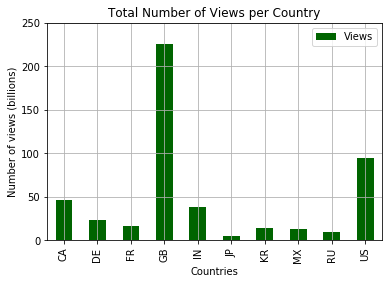

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a bar chart based off of the group countries from before
views_chart = views_country_groups.plot(kind='bar', color='darkgreen')

# Set the xlabel and ylabel using class methods
views_chart.set_xlabel("Countries")
views_chart.set_ylabel("Number of views (billions)")
plt.title("Total Number of Views per Country")

plt.ylim(0, 250)
plt.grid()

plt.show()
plt.tight_layout()

In [8]:
views_country_groups = trending_df.groupby("Country").sum()
views_country_df = pd.DataFrame(views_country_groups)
# views_country_df

population = [37074562, 83124418, 64990511,67141684, 1352642280,
             127202192, 51171706, 126190788, 145734038, 327096265]
views_country_df["Population"] = population

per_capita = (views_country_df['Views']/views_country_df['Population'])#*1000000

views_country_df['Per capita'] = per_capita

views_country_df

,Views,Population,Per capita
Country,,,
CA,46015685626,37074562,1241.165995
DE,23903491661,83124418,287.562815
FR,16640084103,64990511,256.038672
GB,225691823959,67141684,3361.426323
IN,38112307833,1352642280,28.176191
JP,4882504156,127202192,38.383805
KR,14174488408,51171706,276.998551
MX,13233400392,126190788,104.868197
RU,9350728741,145734038,64.162970


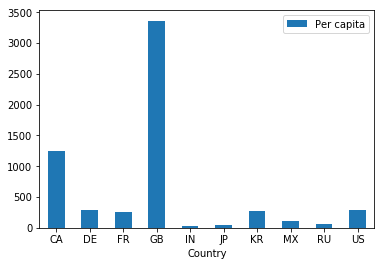

In [9]:
# views_country_df.plot(kind='bar', color='lightblue')
ax = views_country_df.plot.bar(y='Per capita', rot=0)

#plt.grid()

plt.show()
#plt.tight_layout()